## Web scarping

### LinkedIn 1 using Selenium and Beautiful soup
Suppose that Integrify wants to get some insights for the Machine Learning and Data Science job market in order to build the best practice and update the curriculum to maximize the chance for getting as many job offers as possible for the students.

Your tasks are the following:
* Each group member will be working on one country (Finland, Netherlands, Denmark, Sweden, and Germany)
* Use the following keyword sets and try to locate 20 companies in each country:

        DataScience= [Data Science, Big data, Machine learning, Data mining, Artificial intelligence, Predictive modeling, Statistical analysis, Data visualization, Deep learning, Natural language processing, Business intelligence, Data warehousing, Data management, Data cleaning, Feature engineering, Time series analysis, Text analytics, Database, SQL, NoSQL, Neural networks, Regression analysis, Clustering, Dimensionality reduction, Anomaly detection, Recommender systems, Data integration, Data governance]


        MachineLearning = [Machine learning, Data preprocessing, Feature selection, Feature engineering, Data visualization, Model selection, Hyperparameter tuning, Cross-validation, Ensemble methods, Neural networks, Deep learning, Convolutional neural networks, Recurrent neural networks, Natural language processing, Computer vision, Reinforcement learning, Unsupervised learning, Clustering, Dimensionality reduction, Bayesian methods, Time series analysis, Random forest, Gradient boosting, Support vector machines, Decision trees, Regression analysis]
        
* Collect all job offers of each company for a one-year time frame. 
* You will end up with a dictionary where the keys are the company names and the values are a list of dictionaries. 
* The keys in the sub-dictionaries correspond to keywords, and the values correspond to the company’s posts that include those keywords. 
* In total, you will produce five dictionaries, each corresponding to one of the listed countries above. 
* Save each dictionary in JSON format under the name of the corresponding country.





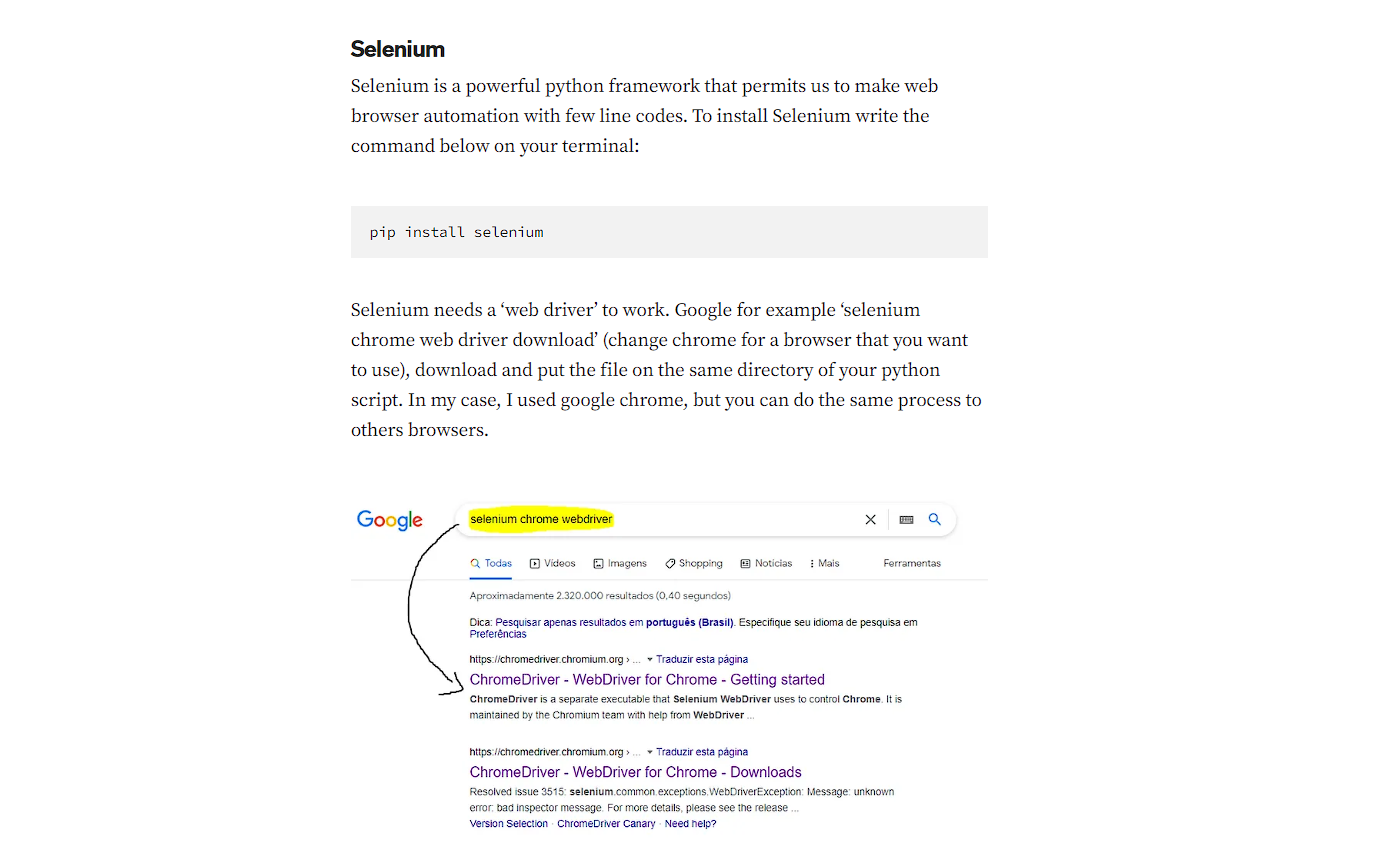

In [48]:
!pip install selenium


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Paste the downloaded chromedriver.exe file at the location where we want to use it.

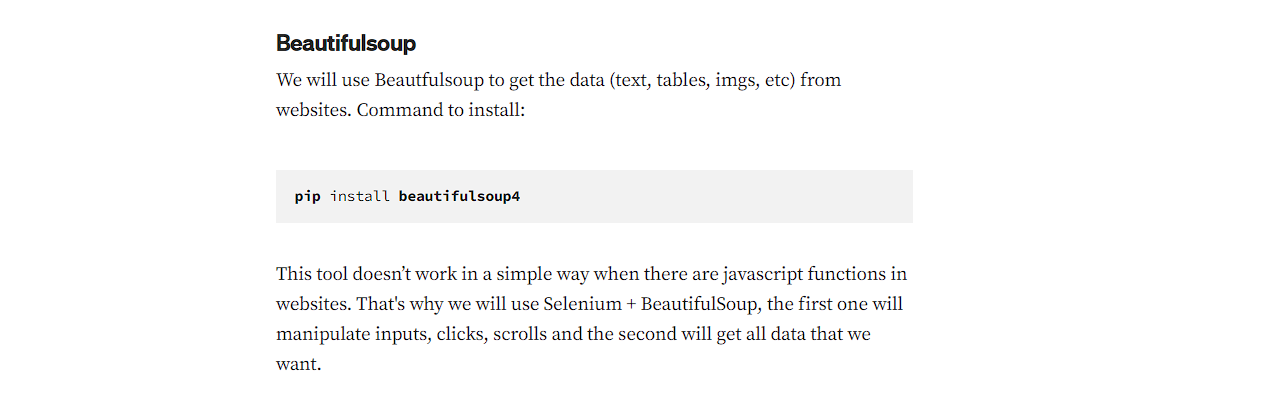

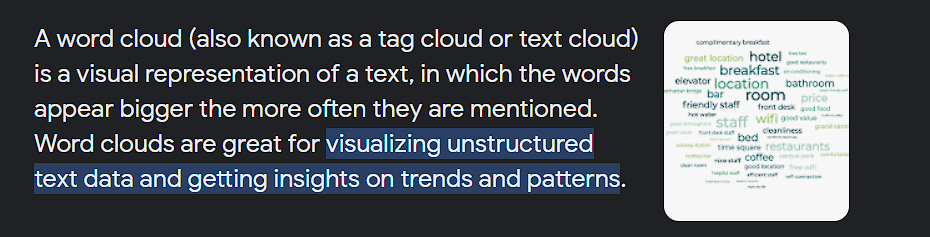

In [49]:
!pip install wordcloud 


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing libraries

In [50]:
!pip install bs4
!pip install urllib
!pip install urlib.request
!pip install ScrapedLinkedInPosts


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement urlib.request (from versions: none)
ERROR: No matching distribution found for urlib.request

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement ScrapedLinkedInPosts (from versions: none)
ERROR: No matching distribution found for ScrapedLinkedInPosts

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import re #regular expression
import os
import json
import pprint #Printing in a better format
import urllib.request
import bs4
# import ScrapedLinkedInPosts

from bs4 import BeautifulSoup
from bs4.element import Comment
from urllib.request import urlopen

# from ScrapedLinkedInPosts import Scrape_Company_Posts

In [52]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

import pandas as pd
import time

#For plotting
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#To send request
import requests

#### LinkedIn emailID and Password

In [53]:
email = "reethikaambatipudi@gmail.com"
password = "Srirama@23"

#### Position and location

In [54]:
position = "data scientist"
location = "denmark"

## formating to linkedin model
position = position.replace(' ', "%20")


In [57]:
## Open browser
driver_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)
#Maximizing browser window to avoid hidden elements
driver.set_window_size(1024, 600)
driver.maximize_window()

## Opening linkedin website
driver.get('https://www.linkedin.com/login')
## waiting load
time.sleep(2)

## Search for login and password inputs, send credentions 
driver.find_element('id','username').send_keys(email)
driver.find_element('id','password').send_keys(password)
driver.find_element('id','password').send_keys(Keys.RETURN)

## Opening jobs webpage
driver.get(f"https://www.linkedin.com/jobs/search/?currentJobId=2662929045&geoId=106057199&keywords={position}&location={location}")
## waiting load
time.sleep(2)

C:\Users\reeth\AppData\Local\Temp\ipykernel_12164\2564756567.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


In [58]:
#For selenium to open the browser, first we put the downloaded file before into a variable, then executes the command:
# select web driver file
driver_path = "chromedriver.exe"
# select your browser (Chrome in this case), and it will open
driver = webdriver.Chrome(executable_path=driver_path)

C:\Users\reeth\AppData\Local\Temp\ipykernel_12164\3324128055.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


In [60]:
# Opening jobs webpage
driver.get(
    f"https://www.linkedin.com/jobs/search/?currentJobId=2662929045&geoId=106057199&keywords={position}&location={location}")
# waiting load
time.sleep(5)

In [62]:
# creating a list where the descriptions will be stored
disc_list = []

for i in range(1, 41):
    # click button to change the job list
    print(f'Page {i}')
    driver.find_element(By.XPATH, f'//button[@aria-label="Page {i}"]').click()
    time.sleep(2)
    
    
    
    # each page show us some jobs, sometimes show 25, others 13 or 21 ¯\_(ツ)_/¯
    jobs_lists = driver.find_element(By.CLASS_NAME,
        'scaffold-layout__list-container')  # here we create a list with jobs
    
    jobs = jobs_lists.find_elements(By.CLASS_NAME,
        'jobs-search-results__list-item')  # here we select each job to count
    
    # waiting load
    time.sleep(2)
    # the loop below is for the algorithm to click exactly on the number of jobs that is showing in list
    # in order to avoid errors that will stop the automation
    
    for job in range(1, len(jobs)+1):
        print(f'Job {job}')
        # job click
        driver.find_element(By.XPATH, f'/html/body/div[5]/div[3]/div[4]/div/div/main/div/section[1]/div/ul/li[{job}]').click()
        time.sleep(1.5)
        driver.find_element(By.XPATH, f'/html/body/div[5]/div[3]/div[4]/div/div/main/div/section[1]/div/ul/li[{job}]/div/div[1]/div[1]/div[2]/div[1]/a').click()        
        # waiting load
        time.sleep(1.5)
        # select job description
        job_desc = driver.find_element(By.ID, 'job-details')
        # get text
        soup = BeautifulSoup(job_desc.get_attribute(
            'outerHTML'), 'html.parser')
        # add text to list
        disc_list.append(soup.text)

Page 1


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//button[@aria-label="Page 1"]"}
  (Session info: chrome=112.0.5615.138)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x0094DCE3+50899]
	(No symbol) [0x008DE111]
	(No symbol) [0x007E5588]
	(No symbol) [0x008108F9]
	(No symbol) [0x00810AFB]
	(No symbol) [0x0083F902]
	(No symbol) [0x0082B944]
	(No symbol) [0x0083E01C]
	(No symbol) [0x0082B6F6]
	(No symbol) [0x00807708]
	(No symbol) [0x0080886D]
	GetHandleVerifier [0x00BB3EAE+2566302]
	GetHandleVerifier [0x00BE92B1+2784417]
	GetHandleVerifier [0x00BE327C+2759788]
	GetHandleVerifier [0x009E5740+672048]
	(No symbol) [0x008E8872]
	(No symbol) [0x008E41C8]
	(No symbol) [0x008E42AB]
	(No symbol) [0x008D71B7]
	BaseThreadInitThunk [0x77017D49+25]
	RtlInitializeExceptionChain [0x77C1B74B+107]
	RtlClearBits [0x77C1B6CF+191]


In [69]:
browser = webdriver.Chrome("chromedriver.exe")
#letting the browser go to linkedin page
browser.get("https://www.linkedin.com")

C:\Users\reeth\AppData\Local\Temp\ipykernel_12164\1073579346.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome("chromedriver.exe")


In [70]:
#entering emailid and password
username = browser.find_element("id", "session_key")
username.send_keys("reethikaambatipudi@gmail.com")
password = browser.find_element("id", "session_password")
password.send_keys("Srirama@23")

#clicking the signin button using python
login_button = browser.find_element(By.CLASS_NAME,"sign-in-form__submit-btn--full-width" )
login_button.click()